In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import time

# **`DATA Import/Review`**

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase
0,"4,175 people found this helpful","Reviewed in the United States on October 23, 2020",I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase
1,"1,667 people found this helpful","Reviewed in the United States on October 23, 2020",This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0 out of 5 stars,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase
2,"1,157 people found this helpful","Reviewed in the United States on October 22, 2020","Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0 out of 5 stars,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase
3,711 people found this helpful,"Reviewed in the United States on October 22, 2020",This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase
4,573 people found this helpful,"Reviewed in the United States on October 23, 2020",I have a few Dots around the house. One decid...,So far so good!,NaN,5.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase
...,...,...,...,...,...,...,...,...,...,...
985,NaN,"Reviewed in the United States on October 5, 2021",After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase
986,NaN,"Reviewed in the United States on February 2, 2021",I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase
987,NaN,"Reviewed in the United States on November 5, 2021","I had this for about a year, I bought it for m...",Could be easier,NaN,2.0 out of 5 stars,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase
988,One person found this helpful,"Reviewed in the United States on April 13, 2022",2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0 out of 5 stars,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase


<AxesSubplot:>

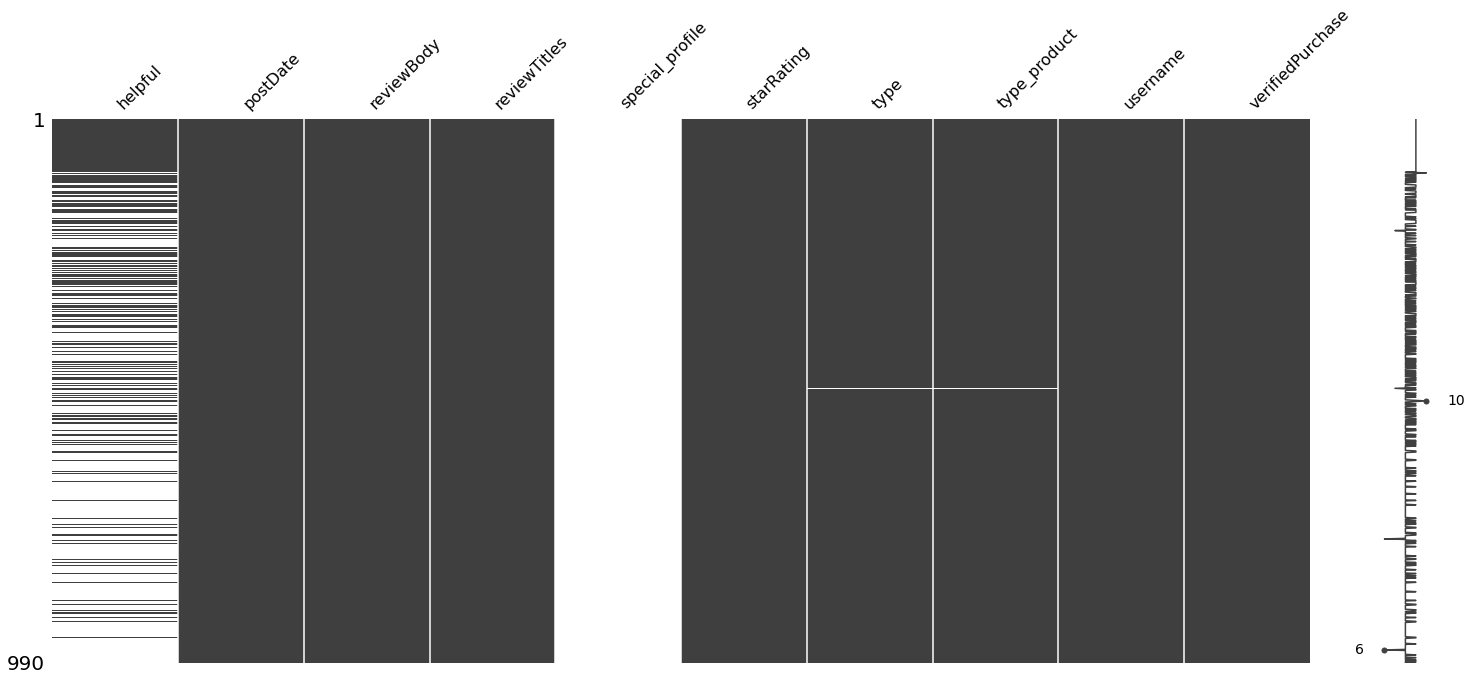

In [4]:
msno.matrix(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   helpful           376 non-null    object
 1   postDate          990 non-null    object
 2   reviewBody        990 non-null    object
 3   reviewTitles      990 non-null    object
 4   special_profile   4 non-null      object
 5   starRating        990 non-null    object
 6   type              986 non-null    object
 7   type_product      986 non-null    object
 8   username          990 non-null    object
 9   verifiedPurchase  990 non-null    object
dtypes: object(10)
memory usage: 77.5+ KB


# **`DATA CLEANING`**

In [6]:
data['helpful'] =  data['helpful'].str.split(' ').str[0] 

In [7]:
data['helpful'].replace("One", "1", inplace= True)

In [8]:
data['helpful'].replace("Helpful", "0", inplace= True)


In [9]:
data['helpful']= pd.to_numeric(data['helpful'].str.replace(",", ""))

In [10]:
data.head()

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase
0,4175.0,"Reviewed in the United States on October 23, 2020",I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase
1,1667.0,"Reviewed in the United States on October 23, 2020",This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0 out of 5 stars,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase
2,1157.0,"Reviewed in the United States on October 22, 2020","Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0 out of 5 stars,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase
3,711.0,"Reviewed in the United States on October 22, 2020",This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase
4,573.0,"Reviewed in the United States on October 23, 2020",I have a few Dots around the house. One decid...,So far so good!,NaN,5.0 out of 5 stars,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase


In [11]:
#data['Review_date'] = data['Review_date'].str[33:]
data['postDate'] = pd.DataFrame(pd.to_datetime(data['postDate'].str.split('on').str[1]))

In [12]:
# data.head()

In [13]:
data['starRating'] = pd.to_numeric(data['starRating'].str.split(' ').str[0])

In [14]:
data.head()

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   helpful           376 non-null    float64       
 1   postDate          990 non-null    datetime64[ns]
 2   reviewBody        990 non-null    object        
 3   reviewTitles      990 non-null    object        
 4   special_profile   4 non-null      object        
 5   starRating        990 non-null    float64       
 6   type              986 non-null    object        
 7   type_product      986 non-null    object        
 8   username          990 non-null    object        
 9   verifiedPurchase  990 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 77.5+ KB


In [16]:
data.describe()

,helpful,starRating
count,376.000000,990.000000
mean,32.029255,2.930303
std,245.633541,1.573347
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,5.000000,5.000000
max,4175.000000,5.000000


# NAN

In [17]:
data['helpful'].fillna(0, inplace= True)

<AxesSubplot:>

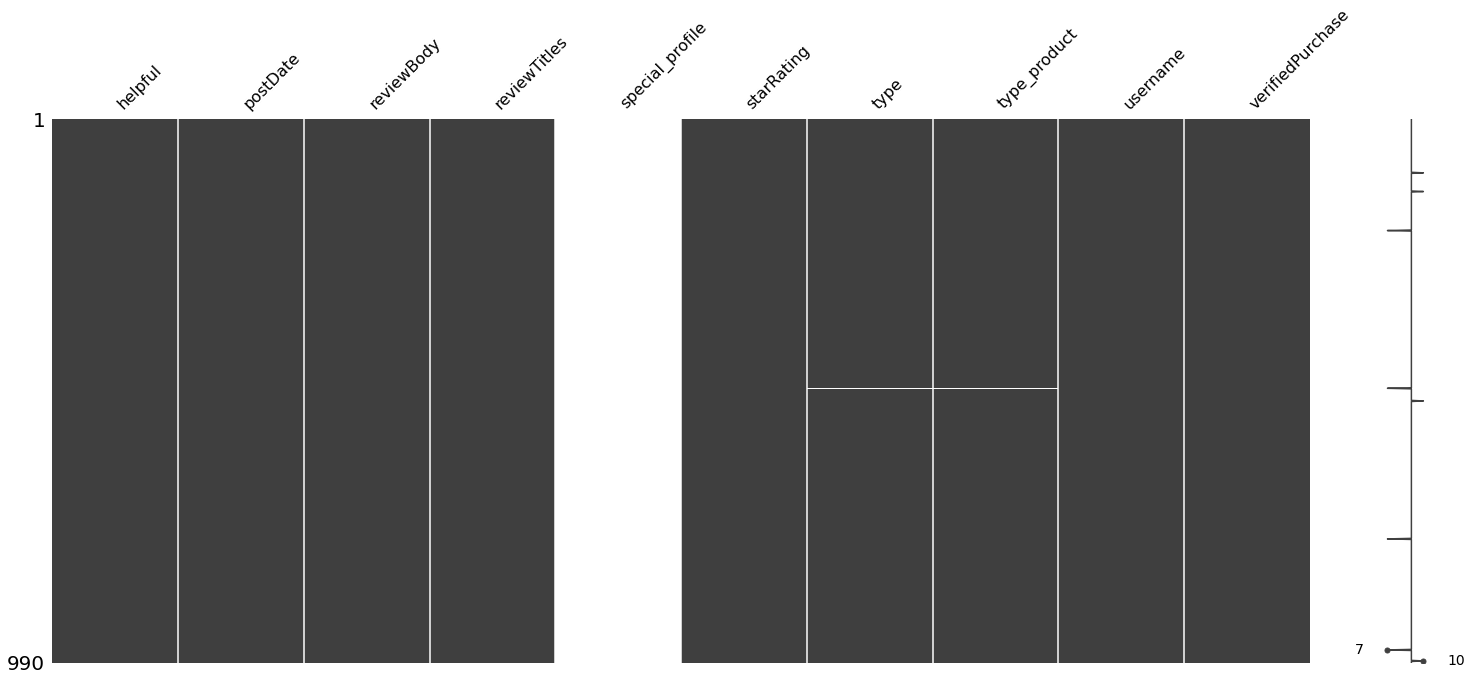

In [18]:
msno.matrix(data)

In [19]:
data[data['type'].isnull()]

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase
203,2.0,2020-11-30,I bought two of these and directly compared th...,Not really any better than the 3rd gen dot but...,NaN,4.0,NaN,NaN,Michael,Verified Purchase
490,5.0,2020-12-20,I’ve purchased three. Sound is wonderful in Co...,Love it!,NaN,5.0,NaN,NaN,Cathee,Verified Purchase
764,0.0,2020-12-17,I love this new Echo Dot. It is a lot bigger ...,Bought this for my hearing impaired Son.,NaN,5.0,NaN,NaN,Ferret Fan,Verified Purchase
966,0.0,2022-02-14,I love this Dot. The sound is significantly be...,Perfect for my office,NaN,5.0,NaN,NaN,Dogs & Horses,Verified Purchase


In [20]:
data = data[data['type'].notna()]

<AxesSubplot:>

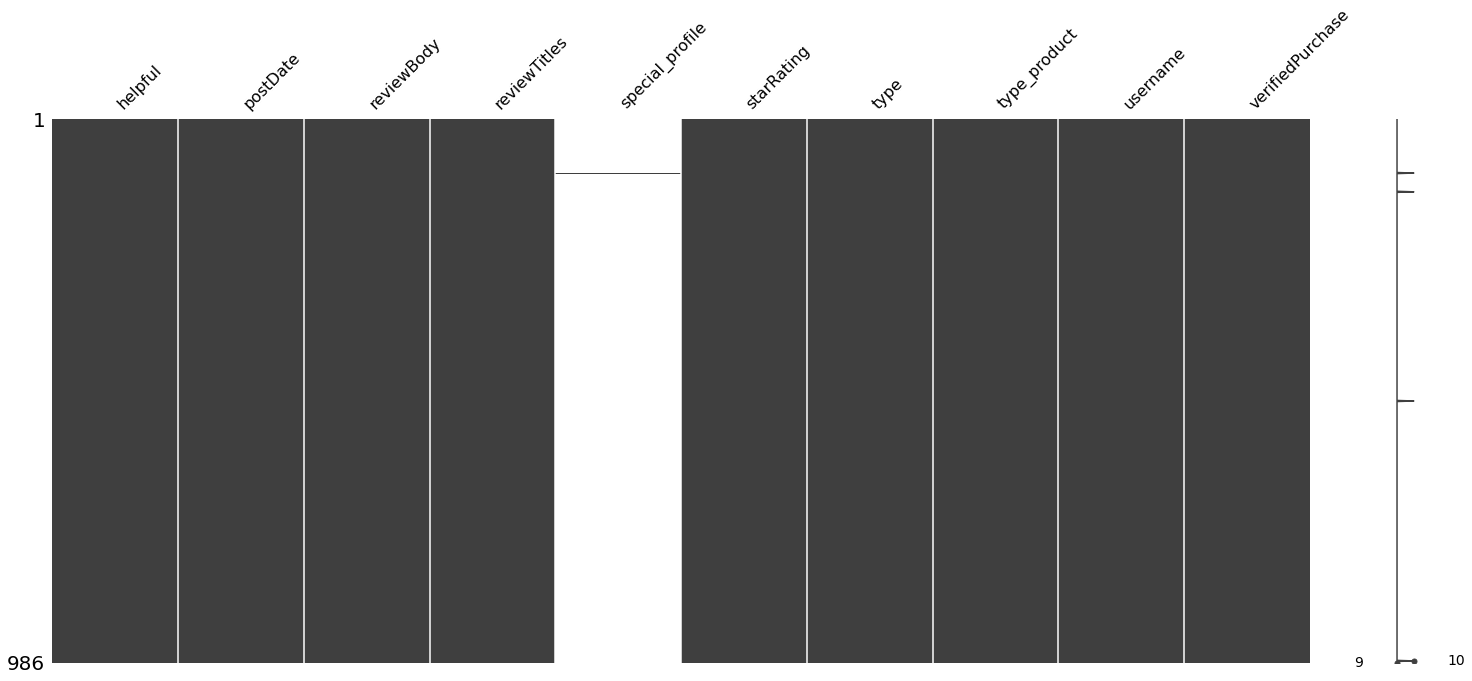

In [21]:
msno.matrix(data)

In [22]:
data.describe()

,helpful,starRating
count,986.000000,986.000000
mean,12.206897,2.922921
std,152.357834,1.572008
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,3.000000
75%,1.000000,5.000000
max,4175.000000,5.000000


In [23]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase
...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase


# Text to quant

In [70]:
from textblob import TextBlob

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


data['Polarity_Body'] = data['reviewBody'].apply(getPolarity)
data['Polarity_Title'] = data['reviewTitles'].apply(getPolarity)

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/552192358.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/552192358.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500
...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase,0.021488,0.000000
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase,0.337619,0.500000
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase,-0.111111,0.000000
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase,-0.089286,0.781250


In [26]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Netural'
    else:
        return 'Positive'

data['Analysis_Body'] = data['Polarity_Body'].apply(getAnalysis)
data['Analysis_Title'] = data['Polarity_Title'].apply(getAnalysis)

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/2762864563.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Analysis_Body'] = data['Polarity_Body'].apply(getAnalysis)
C:\Users\Null\AppData\Local\Temp/ipykernel_10420/2762864563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Analysis_Title'] = data['Polarity_Title'].apply(getAnalysis)


In [27]:
from datetime import date

data['Today_Value'] = pd.to_datetime(date.today())


data['Days'] = (data['Today_Value'] - data['postDate']).dt.days
#.apply(lambda x: x.value)

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/1267639130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Today_Value'] = pd.to_datetime(date.today())
C:\Users\Null\AppData\Local\Temp/ipykernel_10420/1267639130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Days'] = (data['Today_Value'] - data['postDate']).dt.days


In [28]:
data.drop(columns="Today_Value", inplace= True)

c:\Users\Null\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
data['weekday'] = data['postDate'].dt.day_name()

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/1262804216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['postDate'].dt.day_name()


In [30]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase,0.021488,0.000000,Positive,Netural,234,Tuesday
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase,0.337619,0.500000,Positive,Positive,479,Tuesday
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase,-0.111111,0.000000,Negative,Netural,203,Friday
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase,-0.089286,0.781250,Negative,Positive,44,Wednesday


In [31]:

def getbodylen(text):
    return len(text.replace(" ", ""))


data['Body_len'] = data['reviewBody'].apply(getbodylen)
data['Title_len'] = data['reviewTitles'].apply(getbodylen)

C:\Users\Null\AppData\Local\Temp/ipykernel_10420/1968910895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Body_len'] = data['reviewBody'].apply(getbodylen)
C:\Users\Null\AppData\Local\Temp/ipykernel_10420/1968910895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title_len'] = data['reviewTitles'].apply(getbodylen)


In [32]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday,1432,15
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday,1472,21
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday,104,22
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday,782,14
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday,436,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase,0.021488,0.000000,Positive,Netural,234,Tuesday,401,7
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase,0.337619,0.500000,Positive,Positive,479,Tuesday,423,6
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase,-0.111111,0.000000,Negative,Netural,203,Friday,371,13
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase,-0.089286,0.781250,Negative,Positive,44,Wednesday,363,73


In [33]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday,1432,15
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday,1472,21
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday,104,22
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday,782,14
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday,436,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase,0.021488,0.000000,Positive,Netural,234,Tuesday,401,7
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase,0.337619,0.500000,Positive,Positive,479,Tuesday,423,6
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase,-0.111111,0.000000,Negative,Netural,203,Friday,371,13
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase,-0.089286,0.781250,Negative,Positive,44,Wednesday,363,73


# **`Visualization`**

In [34]:
round(data.corr(),5)

,helpful,starRating,Polarity_Body,Polarity_Title,Days,Body_len,Title_len
helpful,1.00000,-0.02799,-0.01815,-0.02065,0.10280,0.05884,-0.03984
starRating,-0.02799,1.00000,0.47857,0.47882,-0.10435,-0.07653,-0.10162
Polarity_Body,-0.01815,0.47857,1.00000,0.35163,-0.05904,-0.07242,-0.05229
Polarity_Title,-0.02065,0.47882,0.35163,1.00000,-0.04987,-0.05727,0.02968
Days,0.10280,-0.10435,-0.05904,-0.04987,1.00000,0.03378,0.08148
Body_len,0.05884,-0.07653,-0.07242,-0.05727,0.03378,1.00000,0.24832
Title_len,-0.03984,-0.10162,-0.05229,0.02968,0.08148,0.24832,1.00000


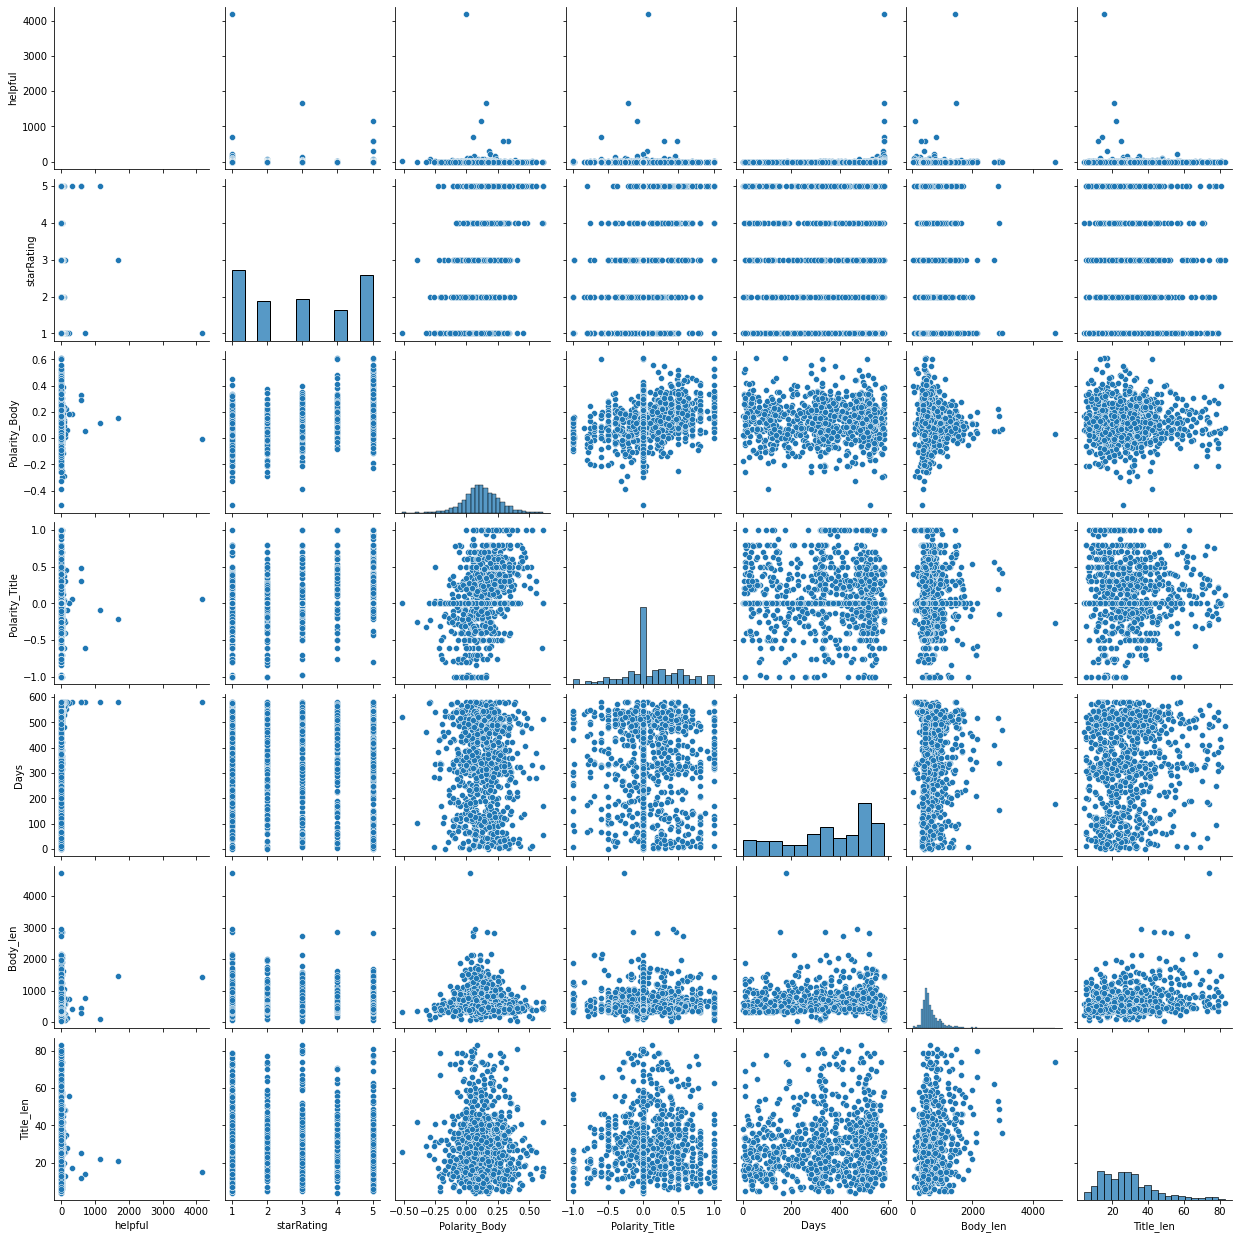

In [35]:
import seaborn as sns
sns.pairplot(data)

In [36]:
import plotly.express as px


fig = px.strip(data, x="weekday", y="Polarity_Body")
fig.show()

In [37]:
import plotly.express as px

df = px.data.tips()
fig = px.strip(data, x="weekday", y="Polarity_Body", color="starRating", facet_col="starRating", category_orders= {"starRating":[5,4,3,2,1]})
fig.show()

In [38]:
import plotly.express as px

df = px.data.tips()
fig = px.strip(data, x="weekday", y="Body_len", color="starRating", facet_col="starRating", category_orders= {"starRating":[5,4,3,2,1]})
fig.show()

In [39]:
from collections import Counter
  
data_set = ' '.join([negative for negative in data['reviewBody']])
split_it = data_set.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(550)

stopwords = []
for a in most_occur:
    stopwords.append(a[0])

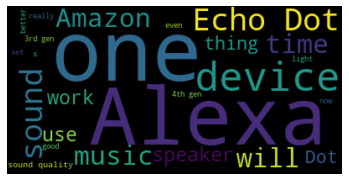

In [40]:
from wordcloud import WordCloud
des = data['reviewBody']
#word clod
allWord = ' '.join([des for des in data['reviewBody']])
wordcloud = WordCloud(max_font_size=100, max_words=25, background_color="black").generate(allWord)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
# split df - positive and negative sentiment:
positive = data[(data['Polarity_Body'] > 0.05) & (data.starRating > 4 )]
# negative = data[data['Polarity_Body'] < 0.05 ]
negative = data[(data['Polarity_Body'] < 0.05) & (data.starRating == 1)]

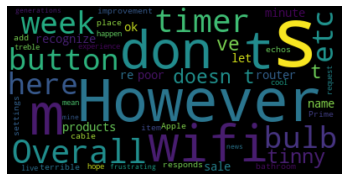

In [42]:
#Positive
#word clod
allWord = ' '.join([positive for positive in data['reviewBody']])
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="black", stopwords= stopwords).generate(allWord)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

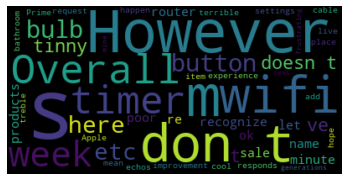

In [43]:
#word clod - negative
allWord = ' '.join([negative for negative in data['reviewBody']])

wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="black", stopwords= stopwords).generate(allWord)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
lang = data['reviewBody'].str.contains('wifi', na = False)
lang

0      False
1      False
2      False
3       True
4      False
       ...  
985    False
986    False
987    False
988     True
989    False
Name: reviewBody, Length: 986, dtype: bool

In [45]:
data.loc[lang, 'reviewBody']

3      This is one of the most infuriating purchases ...
34     This particular Echo Dot stopped working 3 mon...
40     I like the design of this echo better than the...
109    PROS:+ Faster response than my older Dots+ Bet...
119    Update:  OK so now I posted my first ranking r...
128    i have two of these & they BOTH get stuck upda...
144    Fortunately, the one I've gotten was through a...
148    I bought this a few days ago. The initial setu...
153    I bought this Echo Dot for the office space we...
175    I've bought Sengled wifi color brand bulbs and...
207    UPDATE: Had a call from support to help connec...
221    Although the Dot could be fussy about adding o...
305    I would love to give this a 5, but when compar...
324    I am adding additional negative comments about...
327    I would be embarrassed to say how many echo pr...
370    The voice recognition mic doesn't seem as sens...
410    It’s louder than my old flat Alexa and the qua...
466    I don't think the sound 

In [46]:
import plotly.express as px
x = data['Analysis_Body'].value_counts()
fig = px.bar(x,  height=500, width= 500 , text= x)
fig.update_layout(showlegend=False,xaxis_title="Sentiment", yaxis_title="Counts", title = "Sentiment Analysis Body")
fig.show()

In [47]:
import plotly.express as px
x = data['Analysis_Title'].value_counts()
fig = px.bar(x,  height=500, width= 500 , text= x)
fig.update_layout(showlegend=False,xaxis_title="Sentiment", yaxis_title="Counts", title = "Sentiment Analysis Title")
fig.show()

In [48]:
import plotly.express as px

df = data

fig = px.scatter(df, x="Polarity_Body", y="Polarity_Title" , color='Polarity_Title', size="helpful")
fig.show()

In [49]:
import plotly.express as px
fig = px.scatter(data, x="Polarity_Body", y="Polarity_Title", marginal_x="histogram", marginal_y="histogram",size='helpful')


fig.update_layout(
    autosize=False,
    width=500,
    height=500)

fig.show()

In [50]:
df = data
fig = px.scatter(df, x="helpful", y="starRating" , color='Days', size="starRating")
fig.show()

In [51]:
import plotly.express as px

df = px.data.tips()
fig = px.strip(data, x="starRating", y="helpful", color="starRating", facet_col="starRating", category_orders= {"starRating":[5,4,3,2,1]})
fig.show()

In [52]:
data['starRating'].value_counts(normalize=True)

1.0    0.283976
5.0    0.263692
3.0    0.168357
2.0    0.160243
4.0    0.123732
Name: starRating, dtype: float64

In [53]:
import plotly.express as px
x_data = data['Polarity_Body']
fig = px.histogram(data, x= x_data, histnorm='percent', nbins= 20)

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(
        title_text="Distribution of Polarity",
        tickmode="array",
        titlefont=dict(size=30),
    )
)
fig.show()

In [54]:
import plotly.express as px
x_data = data['Polarity_Title']
fig = px.histogram(data, x= x_data, histnorm='percent', nbins= 20)

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(
        title_text="Distribution of Polarity",
        tickmode="array",
        titlefont=dict(size=30),
    )
)
fig.show()

In [55]:
round(data.corr(),5)

,helpful,starRating,Polarity_Body,Polarity_Title,Days,Body_len,Title_len
helpful,1.00000,-0.02799,-0.01815,-0.02065,0.10280,0.05884,-0.03984
starRating,-0.02799,1.00000,0.47857,0.47882,-0.10435,-0.07653,-0.10162
Polarity_Body,-0.01815,0.47857,1.00000,0.35163,-0.05904,-0.07242,-0.05229
Polarity_Title,-0.02065,0.47882,0.35163,1.00000,-0.04987,-0.05727,0.02968
Days,0.10280,-0.10435,-0.05904,-0.04987,1.00000,0.03378,0.08148
Body_len,0.05884,-0.07653,-0.07242,-0.05727,0.03378,1.00000,0.24832
Title_len,-0.03984,-0.10162,-0.05229,0.02968,0.08148,0.24832,1.00000


# **`Analysis`**

In [56]:
data.head()

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday,1432,15
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday,1472,21
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday,104,22
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday,782,14
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday,436,12


In [57]:
year_sum = data.groupby(data['postDate'].dt.year)['username'].count()
#agg(['sum'])

In [58]:
import plotly.express as px

fig = px.bar(year_sum)

fig.update_layout(
    title="Polarity by year",
    xaxis_title="Year",
    yaxis_title="Polarity",
   
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"),
    showlegend=False
)
fig.show()

In [59]:
Pivot = data.groupby([(data['postDate'].dt.year), (data['postDate'].dt.month)]).sum()

In [60]:
Pivot

helpful  starRating  Polarity_Body  Polarity_Title   Days  \
postDate postDate                                                              
2020     10        10037.0        76.0       2.968874        3.449504  14476   
         11          958.0       142.0       5.539809        2.087317  29721   
         12          476.0       341.0      16.101360        3.273934  74189   
2021     1           145.0       340.0      11.863090       13.641458  55593   
         2           120.0       195.0       9.408259        7.404261  28558   
         3            30.0       110.0       3.759582        0.520170  18282   
         4            38.0       105.0       4.877649        3.224709  13785   
         5            32.0       133.0       6.241091        8.754661  16669   
         6           119.0       174.0       5.756170        5.840245  21190   
         7            25.0       306.0      13.264204       18.673892  29155   
         8             6.0       120.0       5.774345        1.660795  11152   
         9             3.0        64.0       2.608131       -1.908095   5873   
         10            8.0        62.0       3.126254        2.687973   6058   
         11           18.0        65.0       2.817483       -0.642262   5561   
         12            9.0        60.0       2.968398       -0.011506   3716   
2022     1             0.0       127.0       4.957939        7.877210   5136   
         2             3.0       104.0       3.417867        3.704618   3457   
         3             4.0        88.0       3.159620        3.069444   2143   
         4             4.0       128.0       6.387332        4.322163   1490   
         5             1.0       142.0       6.311247        8.111147    451   

                   Body_len  Title_len  
postDate postDate                       
2020     10            9764        599  
         11           34128       1582  
         12           99543       4238  
2021     1            74058       3467  
         2            43445       1702  
         3            28042       1239  
         4            28010       1128  
         5            29889       1337  
         6            39337       1792  
         7            58232       2596  
         8            21146        992  
         9            18479        733  
         10           21450        811  
         11           24404        932  
         12           14612        583  
2022     1            20128        997  
         2            22134        868  
         3            19325        857  
         4            19603        845  
         5            23582        983

In [61]:
data

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday,1432,15
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday,1472,21
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday,104,22
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday,782,14
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday,436,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,2021-10-05,After having the Alexa echo dot for about 6 mo...,Quality,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Amazon Customer,Verified Purchase,0.021488,0.000000,Positive,Netural,234,Tuesday,401,7
986,0.0,2021-02-02,I was never too big on these things because I ...,Love it,Top Contributor: Philosophy,5.0,Color: Twilight Blue,Configuration: Echo Dot,Charlie,Verified Purchase,0.337619,0.500000,Positive,Positive,479,Tuesday,423,6
987,0.0,2021-11-05,"I had this for about a year, I bought it for m...",Could be easier,NaN,2.0,Color: Charcoal,Configuration: Echo Dot,Sara,Verified Purchase,-0.111111,0.000000,Negative,Netural,203,Friday,371,13
988,1.0,2022-04-13,2 out of 5 of my echoes kept disconnecting fro...,Malfunction confirmed by Amazon and couldn't r...,NaN,1.0,Color: Glacier White,Configuration: Echo Dot,Roy,Verified Purchase,-0.089286,0.781250,Negative,Positive,44,Wednesday,363,73


In [62]:
#box plot
import plotly.express as px
df = data 
fig = px.box(df, x = "starRating", y="Polarity_Body", color="starRating" ,title="BoxPlot with Gender", 
color_discrete_map={"F":"goldenrod", "M":"blue"}, points="all")
#outliers
#fig.update_traces(boxpoints=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [63]:
import plotly.express as px
df = data 
fig = px.box(df, x = "type", y="Polarity_Body", color="type" ,title="BoxPlot with Gender", 
color_discrete_map={"F":"goldenrod", "M":"blue"}, points="all")
#outliers
#fig.update_traces(boxpoints=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [64]:
import plotly.express as px
df = data 
fig = px.box(df, x = "type_product", y="Polarity_Body", color="type" ,title="BoxPlot with Gender", 
color_discrete_map={"F":"goldenrod", "M":"blue"}, points="all")
#outliers
#fig.update_traces(boxpoints=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [65]:
import plotly.express as px


fig = px.scatter_matrix(data, dimensions=["Polarity_Title", "Polarity_Body"], color="Polarity_Body")


fig.update_layout(
    title='P/C',
    width=600,
    height=600,
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [66]:
#Forward Looking 
data.loc[(data["Polarity_Body"] < -0.05) & (data["starRating"] >= 4)].sort_values(by = 'type')

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
43,20.0,2020-10-22,"Amazon, why? I’ve ordered and received my new...","Charcoal colored version of 4th gen Dot, with ...",NaN,4.0,Color: Charcoal,Configuration: Echo Dot,Bruce Whitney,Verified Purchase,-0.075379,0.000000,Negative,Netural,582,Thursday,230,58
178,1.0,2021-02-20,Me gusta mucho llevo una semana usándola. Te m...,Me encanta.,NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Jose L.,Verified Purchase,-0.189478,0.000000,Negative,Netural,461,Saturday,692,10
616,0.0,2021-05-09,"I have this, among other things, connected to ...","Alexa, just shut up.",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Daniel W. Vondra,Verified Purchase,-0.228125,0.000000,Negative,Netural,383,Sunday,561,17
655,0.0,2021-01-26,Love the Echo Dot. It’s functionality is real...,Great device .... except for the speakers 😕,NaN,4.0,Color: Charcoal,Configuration: Echo Dot,Elton K.,Verified Purchase,-0.060833,0.800000,Negative,Positive,486,Tuesday,539,36
805,0.0,2021-08-23,I used to be skeptical of this device and judg...,Go ahead and get it,NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Zylah Richardson,Verified Purchase,-0.075937,0.000000,Negative,Netural,277,Monday,1127,15
255,0.0,2021-08-06,Update: Amazon responded to my review and sent...,Never Again,NaN,5.0,Color: Glacier White,Configuration: Echo Dot,txmom,Verified Purchase,-0.055481,0.000000,Negative,Netural,294,Friday,750,10
756,1.0,2021-06-18,"Look, at this point every device you put in yo...",Friendly Wiretap,NaN,5.0,Color: Glacier White,Configuration: Echo Dot,B.F.,Verified Purchase,-0.106250,0.375000,Negative,Positive,343,Friday,304,15
181,1.0,2022-03-23,"I work from home, and my mom (late 80s) lives ...",Using to help my mom,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,H. McPherson,Verified Purchase,-0.108333,0.000000,Negative,Netural,65,Wednesday,433,16
478,0.0,2021-07-26,Stopped playing requested song or artist. Now ...,It's okay. Not Great. Just okay.,NaN,4.0,Color: Twilight Blue,Configuration: Echo Dot,Sunshinedaisy,Verified Purchase,-0.073558,0.200000,Negative,Positive,305,Monday,578,27
596,0.0,2021-03-18,Sounds nicer with deeper bass than earlier Ech...,Good sound in a small device,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,aJayM,Verified Purchase,-0.110000,0.283333,Negative,Positive,435,Thursday,540,23


In [67]:
data.loc[2, 'reviewBody']

'Device is great, but beware... the black ones come with a white cable... unlike the previous model.  No idea why they did this.'

# **`Machine Learning`**

In [68]:
data.head()

,helpful,postDate,reviewBody,reviewTitles,special_profile,starRating,type,type_product,username,verifiedPurchase,Polarity_Body,Polarity_Title,Analysis_Body,Analysis_Title,Days,weekday,Body_len,Title_len
0,4175.0,2020-10-23,I purchased this as i always do with the lates...,A Major DOWNGRADE,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Zachary Riley,Verified Purchase,-0.006415,0.062500,Negative,Positive,581,Friday,1432,15
1,1667.0,2020-10-23,This new 4th Gen Echo Dot brings a new spheric...,A VERY slight upgrade(?),NaN,3.0,Color: Charcoal,Configuration: Echo Dot,C,Verified Purchase,0.153079,-0.216667,Positive,Negative,581,Friday,1472,21
2,1157.0,2020-10-22,"Device is great, but beware... the black ones ...","Black device, white cable",NaN,5.0,Color: Charcoal,Configuration: Echo Dot,Michael Russo,Verified Purchase,0.116667,-0.083333,Positive,Negative,582,Thursday,104,22
3,711.0,2020-10-22,This is one of the most infuriating purchases ...,Disappointing.,NaN,1.0,Color: Twilight Blue,Configuration: Echo Dot,Mira,Verified Purchase,0.053770,-0.600000,Positive,Negative,582,Thursday,782,14
4,573.0,2020-10-23,I have a few Dots around the house. One decid...,So far so good!,NaN,5.0,Color: Twilight Blue,Configuration: Echo Dot,Shesinstpete33710,Verified Purchase,0.327165,0.487500,Positive,Positive,581,Friday,436,12


In [69]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = data
X = df.Title_len.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.Polarity_Body)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='Title_len', y='Polarity_Body', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()